#  Задача 1.  Вводное задание.



Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval.

Чтобы прочитать из архива данные, используйте следующий код:

In [ ]:
import numpy as np
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

# Задача 2. Интерполяция полиномом Лагранжа.



Допишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [69]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        X = np.tile(self.xk, (len(self.xk), 1))
        numerator, denominator = (x - X.T), (X - X.T)
        members = np.divide(numerator, 
                            denominator, 
                            out = np.ones_like(X), 
                            where = denominator!=0)
        l = np.product(members, axis = 0)
        return np.sum(l * self.yk) 
        # raise NotImplementedError()

In [70]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

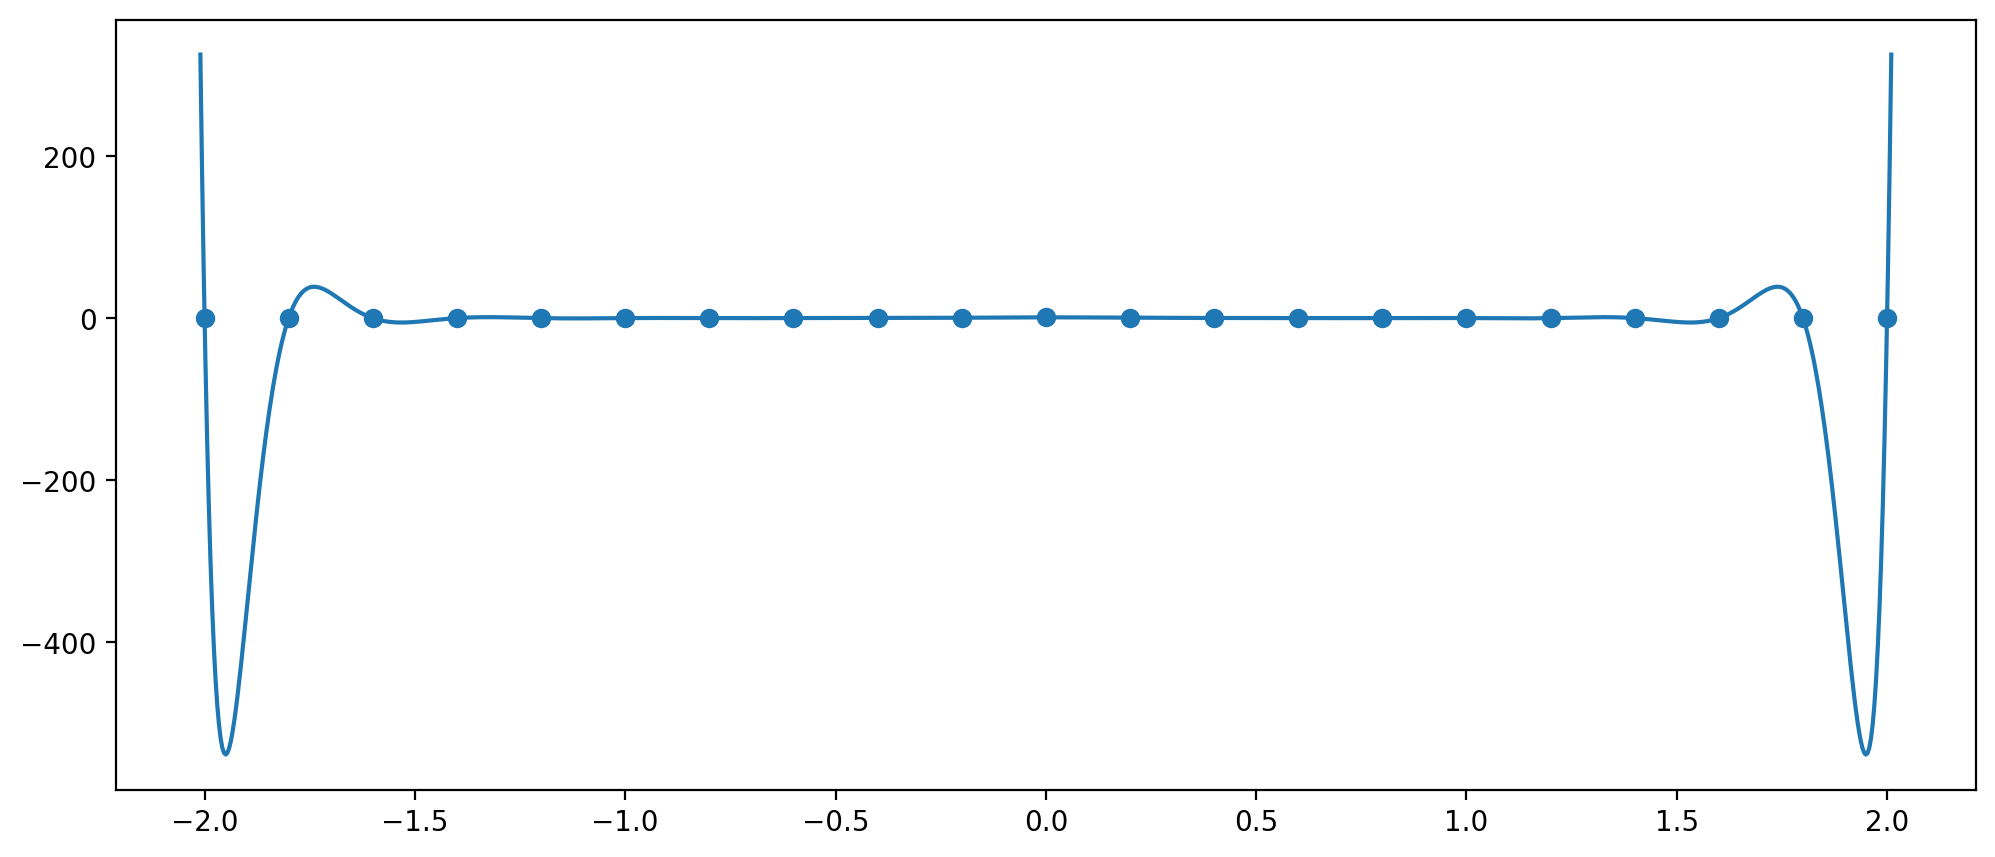

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5), dpi = 200)
x_line = np.linspace(-2.01, 2.01, 1000)
plt.scatter(xx, yy)
plt.plot(x_line, [lagr(x) for x in x_line])

# Задача 3. Феномер Рунге



Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике.

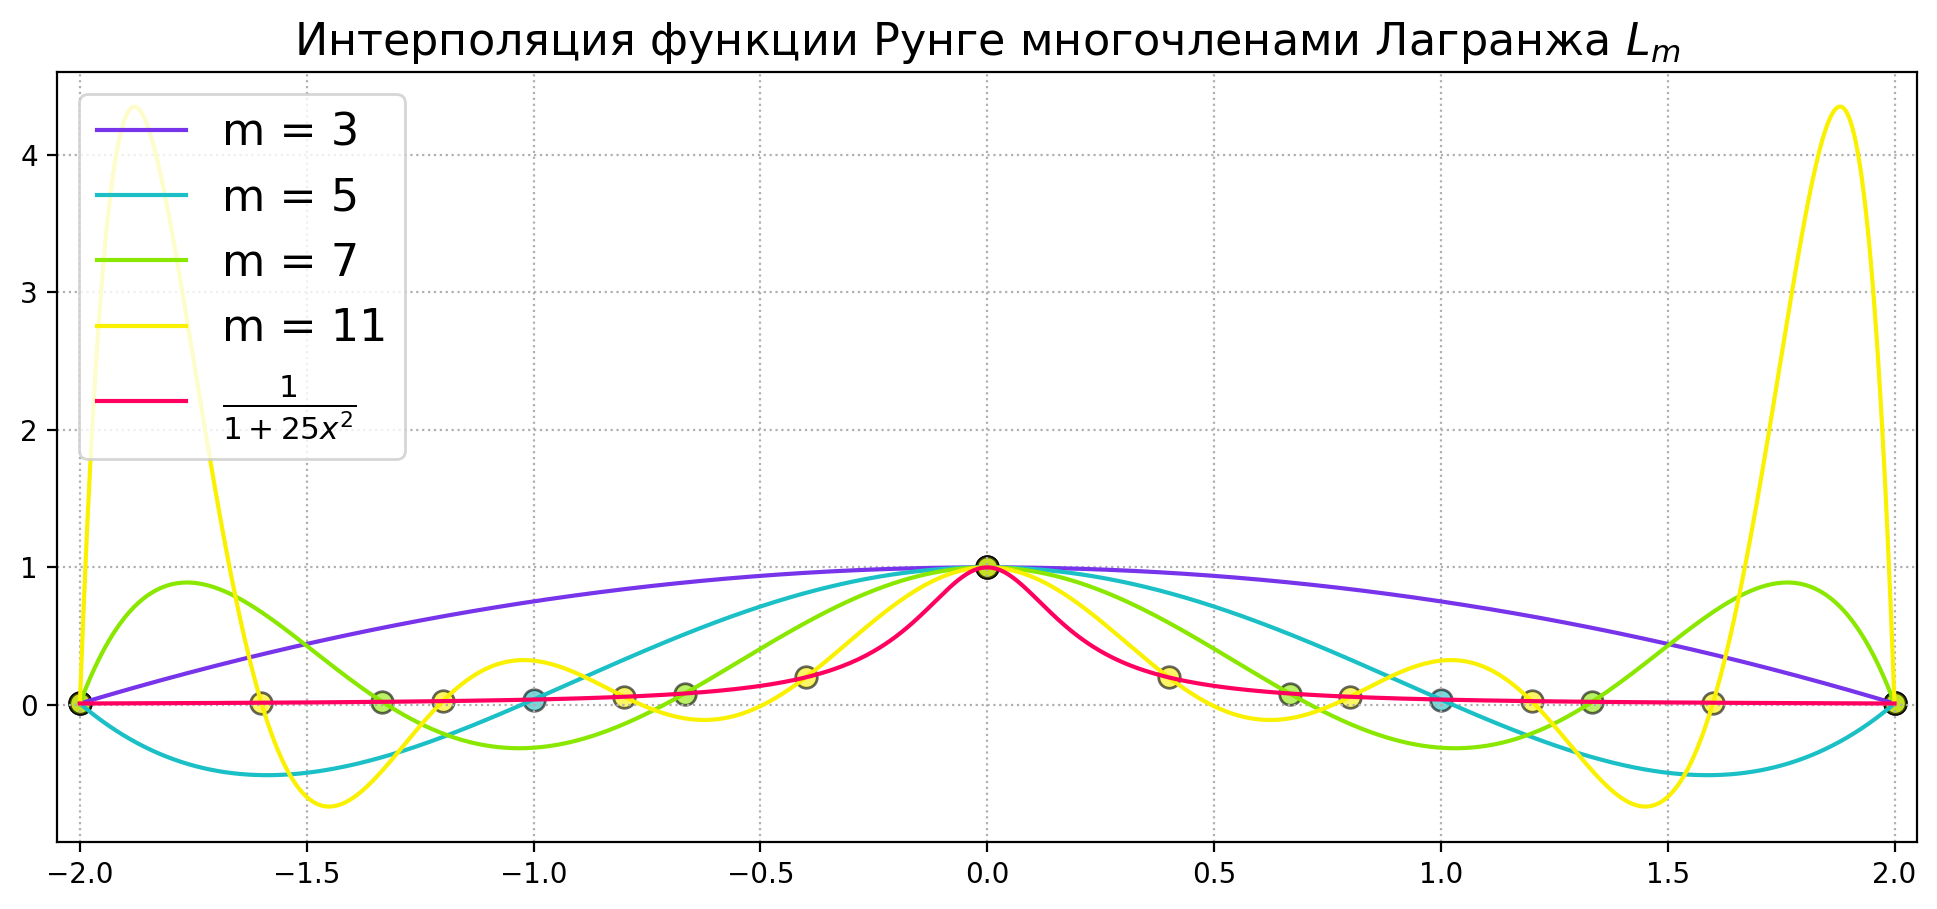

In [85]:
left_limit, right_limit = -2, 2
x_line = np.linspace(left_limit, right_limit, 1000)
m_values = [3, 5, 7, 11]
colors = ['#7734ea', '#1ac0c6', '#8ae800', '#faf100', '#ff0061']
plt.figure(figsize = (12, 5), dpi = 200)
for m, color in zip(m_values, colors):
    grid_x = np.linspace(left_limit, right_limit, m)
    grid_y = runge_func(grid_x)
    lagr = LagrangeInterpolator(grid_x, grid_y)
    y_interpolation = [lagr(x) for x in x_line]
    plt.plot(x_line, y_interpolation, color = color, alpha = 1, label = f'm = {m}')
    plt.scatter(grid_x, grid_y, color = color, alpha = 0.6, s = 60, edgecolors = '#000000')
plt.plot(x_line, runge_func(x_line), color = colors[-1], label = r'$\frac{1}{1 + 25 x^{2}}$')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlim(left_limit - 0.05, right_limit + 0.05)
plt.grid(ls = ':')
plt.title('Интерполяция функции Рунге многочленами Лагранжа $L_{m}$', fontsize = 16);

Допишите функцию, которая возвращает узлы Чебышева.

In [86]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    k = np.arange(n) + 1
    return a + (b - a) * np.cos(np.pi * (2 * k - 1) / (2 * n))
    

In [ ]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

# Задача 4. Полиномы Чебышева.

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

# Задача 5. Приближение разными функциями.

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

# Задача 6. Аппроксимация узлов Чебышева.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным?